In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import re

#### Import the data and get a high-level picture

In [2]:
df = pd.read_csv('sales.csv')
df.head()
data = df

In [3]:
df.shape

(29922, 6)

In [4]:
df.dtypes

order_id       int64
name          object
ordered_at    object
price         object
quantity       int64
line_total    object
dtype: object

#### TODO: Fix column datatypes

Change ordered_at to datetime

Change price and line_total to float

In [5]:
data['ordered_at'] = pd.to_datetime(df['ordered_at'])

In [6]:
data['price'] = pd.to_numeric(df['price'].str[1:])

In [7]:
data['line_total'] = pd.to_numeric(df['line_total'].str[1:])

In [8]:
df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                float64
quantity               int64
line_total           float64
dtype: object

In [9]:
data.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                float64
quantity               int64
line_total           float64
dtype: object

#### TODO: drop if duplicated or null

In [10]:
df[df.duplicated()].shape[0]

538

In [11]:
data = df.drop_duplicates()

In [12]:
data = df.dropna()

In [13]:
df.isnull().sum()

order_id         0
name          1488
ordered_at       0
price            0
quantity         0
line_total       0
dtype: int64

In [14]:
data.isnull().sum()

order_id      0
name          0
ordered_at    0
price         0
quantity      0
line_total    0
dtype: int64

In [15]:
df[df['name'].isnull()].head()

,order_id,name,ordered_at,price,quantity,line_total
3,10001,NaN,2018-01-01 12:14:54,1.5,1,1.5
6,10002,NaN,2018-01-01 12:23:09,3.0,3,9.0
27,10007,NaN,2018-01-01 15:03:17,2.5,1,2.5
77,10026,NaN,2018-01-02 03:25:40,0.5,2,1.0
88,10031,NaN,2018-01-02 05:45:48,3.5,3,10.5


In [16]:
data[data['name'].isnull()].head()

,order_id,name,ordered_at,price,quantity,line_total


#### Sanity check for value ranges and to check assumptions

In [17]:
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

29

In [18]:
df[df['line_total'] < 0].shape[0]

282

#### TODO: 
Set line_total = price * quantity if different
Remove if line total < 0

In [19]:
data.loc[data['price']*data['quantity'] != data['line_total']].head()

,order_id,name,ordered_at,price,quantity,line_total
68,10022,"""SORBET"" Lychee",2018-01-02 00:38:37,3.0,2,5.0
295,10097,"""BEVERAGE"" Iced Coffee",2018-01-03 12:20:11,2.5,2,6.0
3203,11071,"""ICE CREAM"" Wildberry",2018-01-23 13:26:07,1.5,2,2.0
6475,12172,"""BEVERAGE"" Tea",2018-02-16 07:19:04,4.0,3,11.0
7472,12504,"""ICE CREAM"" Candied Bacon",2018-02-23 06:55:04,0.5,2,0.0


In [20]:
data.assign(line_total=lambda x: x.price * x.quantity)

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5
5,10002,"""SORBET"" Lychee",2018-01-01 12:23:09,3.0,1,3.0
...,...,...,...,...,...,...
29917,18452,"""ICE CREAM"" Dulce De Leche",2018-06-26 03:56:13,-1.5,2,-3.0
29918,12889,"""ICE CREAM"" Dark Chocolate",2018-03-03 10:06:21,4.0,3,12.0
29919,14526,"""ICE CREAM"" Peanut Fudge",2018-04-05 17:33:24,3.5,3,10.5
29920,19589,"""CONE"" Dipped Waffle Cone",2018-07-20 09:10:01,3.5,2,7.0


In [21]:
data.loc[data['price']*data['quantity'] != data['line_total']].head()

,order_id,name,ordered_at,price,quantity,line_total
68,10022,"""SORBET"" Lychee",2018-01-02 00:38:37,3.0,2,5.0
295,10097,"""BEVERAGE"" Iced Coffee",2018-01-03 12:20:11,2.5,2,6.0
3203,11071,"""ICE CREAM"" Wildberry",2018-01-23 13:26:07,1.5,2,2.0
6475,12172,"""BEVERAGE"" Tea",2018-02-16 07:19:04,4.0,3,11.0
7472,12504,"""ICE CREAM"" Candied Bacon",2018-02-23 06:55:04,0.5,2,0.0


In [22]:
(data['line_total']<0).sum()

282

In [23]:
data = data[data['line_total']>0]

In [24]:
data.loc[data['price']*data['quantity'] != data['line_total']].head()

,order_id,name,ordered_at,price,quantity,line_total
68,10022,"""SORBET"" Lychee",2018-01-02 00:38:37,3.0,2,5.0
295,10097,"""BEVERAGE"" Iced Coffee",2018-01-03 12:20:11,2.5,2,6.0
3203,11071,"""ICE CREAM"" Wildberry",2018-01-23 13:26:07,1.5,2,2.0
6475,12172,"""BEVERAGE"" Tea",2018-02-16 07:19:04,4.0,3,11.0
8781,12937,"""BEVERAGE"" Tea",2018-03-04 06:52:12,4.0,2,9.0


In [25]:
data.describe()

,order_id,price,quantity,line_total
count,28150.000000,28150.000000,28150.000000,28150.000000
mean,14992.001670,2.510444,2.001741,5.028064
std,2888.643287,1.059710,0.819513,3.086042
min,10000.000000,0.500000,1.000000,0.500000
25%,12500.250000,1.500000,1.000000,2.500000
50%,14967.500000,2.500000,2.000000,4.500000
75%,17506.000000,3.500000,3.000000,7.500000
max,19999.000000,4.000000,3.000000,12.000000


#### TODO: Get value between "" in name and put it in category column

In [26]:
s = data['name']
s = s.str.split(pat='"', expand = True)
s

,0,1,2
0,,ICE CREAM,Peanut Fudge
1,,ICE CREAM,Peanut Fudge
2,,SORBET,Raspberry
4,,CONE,Dipped Waffle Cone
5,,SORBET,Lychee
...,...,...,...
29916,,BEVERAGE,Iced Coffee
29918,,ICE CREAM,Dark Chocolate
29919,,ICE CREAM,Peanut Fudge
29920,,CONE,Dipped Waffle Cone


In [29]:
data['name'] = s[2]
data['category']= s[1]

In [30]:
data.head()

,order_id,name,ordered_at,price,quantity,line_total,category
0,10000,Peanut Fudge,2018-01-01 11:30:00,3.5,3,10.5,ICE CREAM
1,10000,Peanut Fudge,2018-01-01 11:30:00,3.5,1,3.5,ICE CREAM
2,10001,Raspberry,2018-01-01 12:14:54,2.5,2,5.0,SORBET
4,10001,Dipped Waffle Cone,2018-01-01 12:14:54,3.5,1,3.5,CONE
5,10002,Lychee,2018-01-01 12:23:09,3.0,1,3.0,SORBET


#### Analysis, finally!

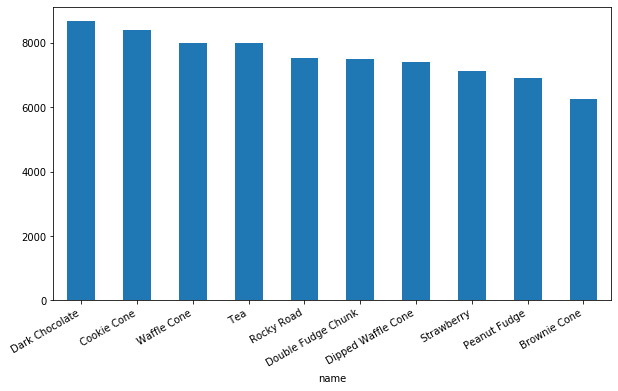

In [32]:
f, ax = plt.subplots(figsize=(10, 6))
data.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()